In [1]:
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

warnings.filterwarnings('ignore')

### Data preparation

In [2]:
df = pd.read_csv('data/covid19-clean.csv')
df['Date'] = df['Date'].apply(lambda row: datetime.strptime(row, "%d %B %Y "))

In [3]:
data = df[['Date', 'Confirmed daily']]
data.columns = ['ds', 'y']

# Modeling

### Model creation

In [4]:
model_args = {
    'seasonality_mode': 'additive', 
    'changepoint_prior_scale': 0.6,
    'weekly_seasonality': 10,
    'yearly_seasonality': False,
    'daily_seasonality': False
}

In [5]:
model = Prophet(**model_args)
model.fit(data[40:])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [6]:
future = model.make_future_dataframe(periods = 1)
forecast = model.predict(future)

In [7]:
forecast['y'] = model.history['y']
forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,y,yhat,yhat_lower,yhat_upper
68,2020-06-13,440.0,385.116509,289.037212,482.189201
69,2020-06-14,375.0,383.187930,290.569764,482.250293
70,2020-06-15,396.0,377.737474,283.313242,479.981272
71,2020-06-16,407.0,399.147356,302.159680,497.715783
72,2020-06-17,506.0,393.192944,290.473522,487.032681
73,2020-06-18,314.0,374.420257,283.651672,472.816372
74,2020-06-19,352.0,394.647187,294.890268,498.455308
75,2020-06-20,309.0,384.208109,284.266275,480.177235
76,2020-06-21,311.0,382.279530,290.063871,473.690424
77,2020-06-22,NaN,376.829074,278.061546,483.764165


### Model explanation

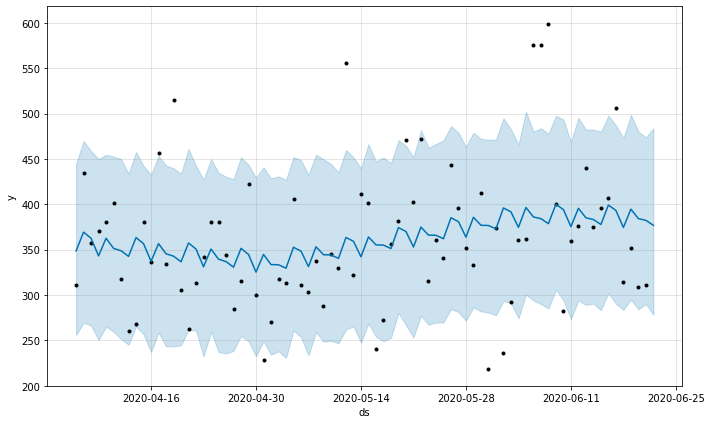

In [8]:
fig = model.plot(forecast)

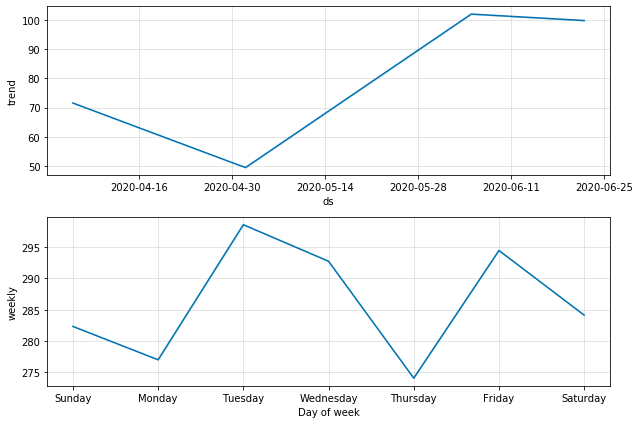

In [9]:
fig = model.plot_components(forecast)

### Model performance

In [10]:
results = cross_validation(model, initial = '69 days', horizon = '1 day', period = '1 day')
metrics = performance_metrics(results)

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-06-14 00:00:00 and 2020-06-20 00:00:00


In [11]:
results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-15,398.312066,305.696304,494.914823,396.0,2020-06-14
1,2020-06-16,421.882439,329.710105,517.150927,407.0,2020-06-15
2,2020-06-17,405.725476,311.955269,500.805829,506.0,2020-06-16
3,2020-06-18,420.086704,324.806468,515.178548,314.0,2020-06-17
4,2020-06-19,426.648549,322.799246,515.701845,352.0,2020-06-18
5,2020-06-20,414.919769,316.261262,513.756532,309.0,2020-06-19
6,2020-06-21,408.641403,320.122594,498.510501,311.0,2020-06-20


In [12]:
metrics

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,6837.349791,82.688269,71.680779,0.206749,0.21207,0.428571


### Tomorrow prediction

In [13]:
np.round(forecast.iloc[-1]['yhat']).astype(int)

377